In [1]:
%load_ext autoreload
%autoreload 2
from codeplot import plot

In [2]:
from data64.pacs import pacs0_combin_erm_hps_soup_0420_v1, pacs0_combin_erm_hps_soup_0420_v1, pacs0_combin_erm_hps_soup_0420, pacs0_combin_erm_hps_swa_0420_v0, pacs0_combin_erm_hps_swa_0420, pacs0_combin_erm_hps_swa_0422_579
from data64.pacs import pacs0_combin_erm_hps_swa_0422, pacs0_combin_erm_hps_swa_0423

In [3]:
def old_iter_clean_lsoup(lsoup, minnetm=0.):
    return [
        [l for l in m
         if all(steps not in l["dirs"].split("_") for steps in ["0", "100", "200", "300", "400", "500"])
         and l["netm"]< l["soup"]+0.002 and l["netm"] > minnetm
        ]
        for m in lsoup
    ]

In [4]:
#l = plot.merge(pacs0_combin_erm_hps_swa_0420_v0.lswa, pacs0_combin_erm_hps_swa_0420.lswa, pacs0_combin_erm_hps_swa_0422_579.lswa
l = plot.merge(pacs0_combin_erm_hps_swa_0422.lswa, pacs0_combin_erm_hps_swa_0423.lswa)
lsoup =  plot.merge(pacs0_combin_erm_hps_soup_0420.lsoup, pacs0_combin_erm_hps_soup_0420_v1.lsoup)

# Ind acc

In [ ]:
intervals_net_netm = [0.74, 0.92]
dict_key_to_limit_netm = {"net": intervals_net_netm, "netm": intervals_net_netm}

In [ ]:
THESS=False
plot.plt.rcParams["figure.figsize"] = (6,6)
fig_netm_soup = plot.plot_key(l=plot.merge(l, lsoup), key1="netm", key2="soup", order=1, label="No", _dict_key_to_limit=dict_key_to_limit_netm, fcard=2, diag=True, _dict_key_to_label="2", linestyle="dotted")

In [ ]:
THESS=False
plot.plt.rcParams["figure.figsize"] = (6,6)

fig_net_soup = plot.plot_key(l=plot.merge(l, lsoup), key1="net", key2="soup", order=1, label="No", _dict_key_to_limit=dict_key_to_limit_netm, fcard=2, diag=True, _dict_key_to_label="2", linestyle="dotted")

In [ ]:
plot.save_fig(fig_netm_soup, "pacs_samediffruns_net2_soup.png")
plot.save_fig(fig_net_soup, "pacs_samediffruns_ens2_soup.png")

In [ ]:

plot.plt.rcParams["figure.figsize"] = (5,5)

fig_ensm210_soup = plot.plot_key(l=plot.merge(l, lsoup)[:-1], key1="net", key2="soup", order="", label="M=", _dict_key_to_limit=dict_key_to_limit_netm, diag=True, _dict_key_to_label="def", linestyle="dotted", loc="upper left")

In [ ]:
plot.save_fig(fig_ensm210_soup, "pacs0_samediffruns210_ens_wa.png")

# Diversity with ERM

In [9]:
_dict_key_to_limit = {"soup-netm": [-0.003, 0.11], "df": [0.0, 0.45], "dr": [0.45, 2.4]}

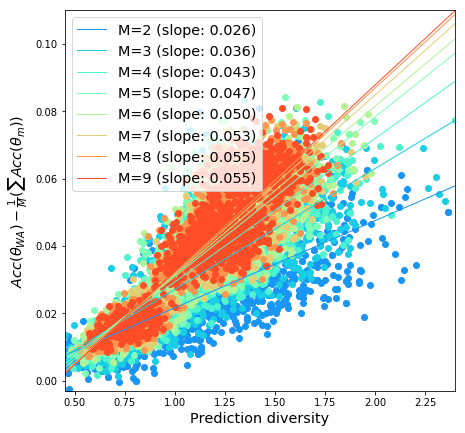

In [16]:
THESS=False
plot.plt.rcParams["figure.figsize"] = (7,7)
fig_dr = plot.plot_key(l=plot.merge(l,lsoup), key1="dr", key2="soup-netm", order=1, label="M=", _dict_key_to_limit=_dict_key_to_limit, loc="upper left")

In [17]:
plot.save_fig(fig_dr, "pacs0_samediffruns_dr_soup-netm.png")

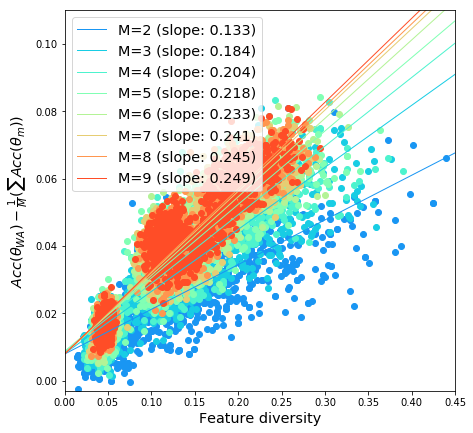

In [18]:
plot.plt.rcParams["figure.figsize"] = (7,7)
fig_df = plot.plot_key(l=plot.merge(l, lsoup), key1="df", key2="soup-netm", order=1, label="M=", _dict_key_to_limit=_dict_key_to_limit, loc="upper left")

In [19]:
plot.save_fig(fig_df, "pacs0_samediffruns_df_soup-netm.png")

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,7)

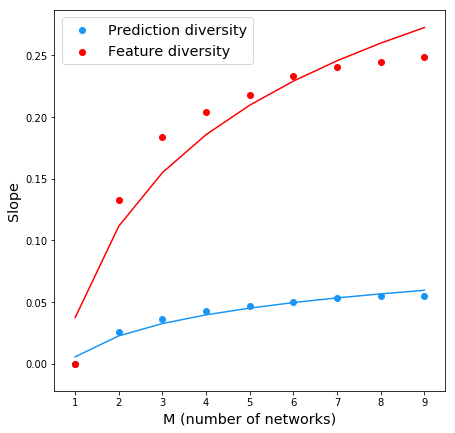

In [26]:

def plot_slopes_c():
    dr = [0, 26, 36, 43,47,50,53,55,55]
    df = [0, 133, 184, 204, 218, 233,241,245,249]

    fig = plt.figure()
    dr = [d/1000 for d in dr]
    df = [d/1000 for d in df]
    m = list(range(1, 10))
    colors = cm.rainbow(np.linspace(0.2, 1, 2))
    plt.scatter(m, dr, label="Prediction diversity", color=colors[0])
    plot.fit_and_plot_with_value(m, dr, order="log", label=None, color=colors[0], ax=None)
    plt.scatter(m, df, label="Feature diversity", color=colors[1])
    plot.fit_and_plot_with_value(m, df, order="log", label=None, color=colors[1], ax=None)
    plt.xlabel("M (number of networks)", fontsize="x-large")
    plt.ylabel(r"Slope",  fontsize="x-large")
    plt.legend(fontsize="x-large")
    return fig
fig = plot_slopes_c()


In [27]:
plot.save_fig(fig, "pacs0_m_slope.png")

# Old

In [ ]:

def plot_markers(l1, l2, key1, key2, order=1, diag=False):

    plt.xlabel(dict_key_to_label.get(key1, key1))
    plt.ylabel(dict_key_to_label.get(key2, key2))

    def plot_without_int(l, color, label, marker):
        t = get_x(l, key1)
        if t == []:
            return
        plt.scatter(get_x(l, key1), get_x(l, key2), color=color, label=label, marker=marker)

    def plot_with_int(l, color):
        if order == 1:
            m, b = np.polyfit(get_x(l, key1), get_x(l, key2), 1)
            plt.plot(get_x(l, key1), m * np.array(get_x(l, key1)) + b, color=color)#, label=label +": " + "{:.0f}".format(m*1000))
        elif order == 2:
            m2, m1, b = np.polyfit(get_x(l, key1), get_x(l, key2), 2)
            get_x1_sorted = sorted(get_x(l, key1))
            preds = m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
            plt.plot(get_x1_sorted, preds, color=color)# label="int."+label)
        elif order == 3:
            m3, m2, m1, b = np.polyfit(get_x(l, key1), get_x(l, key2), 3)
            get_x1_sorted = sorted(get_x(l, key1))
            preds = m3 * np.array(get_x1_sorted)**3 + m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
            plt.plot(get_x1_sorted, preds, color=color)# label="int."+label)
        elif order == "2log":
            m2, m1, b = np.polyfit(np.log(get_x(l, key1)), get_x(l, key2), 2)
            get_x1_sorted = np.log(sorted(get_x(l, key1)))
            preds = m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
            plt.plot(sorted(get_x(l, key1)), preds, color=color)# label="int."+label)

    colors1 = cm.Blues(np.linspace(0, 1, len(l1)))
    colors2 = cm.Reds(np.linspace(0, 1, len(l2)))
    labels1 = ["swa" + str(i) for i in range(len(l1))]
    labels2 = ["soup" + str(i) for i in range(len(l1))]
    for card in range(len(l1)):
        if l1[card] == []:
            continue
        plot_without_int(l1[card], color=colors1[card], label=labels1[card], marker=".")
        plot_with_int(l1[card] + l2[card], color=colors1[card])
    for card in range(len(l2)):
        if l2[card] == []:
            continue
        plot_without_int(l2[card], color=colors2[card], label=labels2[card], marker="*")
    if diag:
        xpoints = ypoints = plt.xlim()
        plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False, label="y=x")

    plt.legend()

In [ ]:
plot_key3(key1="netm", key2="soup", order=2, key3="df")

In [ ]:

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

all_l = [x for ll in l[-3:] for x in ll]    
Xi = get_x(all_l, "netm")
Yi = get_x(all_l, "df")
Zi = get_x(all_l, "soup")

In [ ]:
set_xy = set([])
indexes = []
for i, (x, y) in enumerate(zip(Xi, Yi)):
    if (x, y) not in set_xy:
        set_xy.add((x, y))
        indexes.append(i)


Pf = np.array([[Xi[i], Yi[i]] for i in indexes])
Zf = np.array([Zi[i] for i in indexes])
Nf = len(indexes)

In [ ]:
x_mesh = np.linspace(0.55, 0.65, 100)
y_mesh = np.linspace(0.1, 0.2, 100)
X, Y = np.meshgrid(x_mesh, y_mesh)
P = np.array([X.flatten(), Y.flatten() ]).transpose()

In [ ]:
from scipy.interpolate import griddata
Z_cubic = griddata(Pf, Zf, P, method = "cubic").reshape([100, 100])

In [ ]:
Z_nearest = griddata(Pf, Zf, P, method = "cubic").reshape([100, 100])
plt.contourf(X, Y, Z_nearest, 50)
plt.plot(Xi, Yi, "or", label = "Data")
plt.colorbar()
plt.legend()
plt.grid()
plt.show()

In [ ]:
plot_key3(key1="netm", key2="df", key3="soup", order=1)

In [ ]:
def plot_key3(key1, key2, key3=None, order=1):

    plt.xlabel(dict_key_to_label.get(key1, key1))
    plt.ylabel(dict_key_to_label.get(key2, key2))

    def plot_with_int(l, label, key3=None, order=None):
        t = get_x(l, key1)
        if t == []:
            return
        if key3:
            c = get_x(l, key3)
            cmap = plt.cm.get_cmap("Reds", 6)

        if order == 1:
            m, b = np.polyfit(get_x(l, key1), get_x(l, key2), 1)
            plt.plot(get_x(l, key1), m * np.array(get_x(l, key1)) + b, label=label +": " + "{:.0f}".format(m*1000))
            if key3:
                plt.scatter(get_x(l, key1), get_x(l, key2), c=c, cmap=cmap)

        elif order == 2:
            m2, m1, b = np.polyfit(x(l, key1), x(l, key2), 2)
            x1_sorted = sorted(x(l, key1))
            preds = m2 * np.array(x1_sorted)**2 + m1 * np.array(x1_sorted) + b
            plt.plot(x1_sorted, preds, label=label)# label="int."+label)
            if key3:
                plt.scatter(x(l, key1), x(l, key2), c=c, cmap=cmap)

    for card in range(9, 11):
        plot_with_int(l[card], label="swa" + str(card), order=0)

    plot_with_int([x for card in range(1, 10) for x in l[card]], label="all", key3=key3, order=order)
    cbar = plt.colorbar()
    cbar.set_label(dict_key_to_label.get(key3, key3))
    plt.legend()

In [ ]:
def plot_key_mash(key1, key2, key3=None, order=1):

    plt.xlabel(dict_key_to_label.get(key1, key1))
    plt.ylabel(dict_key_to_label.get(key2, key2))

    def plot_with_int(l, label, order=None):
        t = x(l, key1)
        if t == []:
            return

        if order == 1:
            m, b = np.polyfit(x(l, key1), x(l, key2), 1)
            plt.plot(x(l, key1), m * np.array(x(l, key1)) + b, label=label +": " + "{:.0f}".format(m*1000))

        elif order == 2:
            m2, m1, b = np.polyfit(x(l, key1), x(l, key2), 2)
            x1_sorted = sorted(x(l, key1))
            preds = m2 * np.array(x1_sorted)**2 + m1 * np.array(x1_sorted) + b
            plt.plot(x1_sorted, preds, label=label)# label="int."+label)

    for card in range(8, 11):
        plot_with_int(l[card], label="swa" + str(card), order=0)

    all_l = [x for ll in l for x in ll]    
    z = x(all_l, key3)
    z_min, z_max = -np.abs(z).max(), np.abs(z).max()
    
    plt.pcolormesh(x(all_l, key1), x(all_l, key2), z, cmap='RdBu', vmin=z_min, vmax=z_max)
    #ax.set_title('pcolormesh')
    #cbar.set_label(dict_key_to_label.get(key3, key3))
    plt.legend()

In [ ]:

def plot_slopes_c():
    fig = plt.figure()
    dr = [96, 177, 202, 207, 236, 258, 303, 312]
    dr = [d/1000 for d in dr]
    df = [52, 105, 135, 134, 158, 158, 203, 229]
    df = [d/1000 for d in df]
    m = list(range(2, 10))
    plt.scatter(m, dr, label="Prediction diversity", color="blue")
    fit_and_plot_slope(m, dr, order="log", label=None, color="blue", ax=None)
    plt.scatter(m, df, label="Feature diversity", color="red")
    fit_and_plot_slope(m, df, order="log", label=None, color="red", ax=None)
    plt.xlabel(dict_key_to_label["length"], fontsize="x-large")
    plt.ylabel(r"Slope",  fontsize="x-large")
    plt.legend()
    return fig
fig = plot_slopes_c()
save_fig(fig, "m_slope.png")